In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

from collections import Counter
import re

In [2]:
set_seed(0)
seq = [random_seq(200) for _ in range(10000)]
df = pd.DataFrame(seq, columns=['seq'])
df.to_csv('../data/Gosai_MPRA/random_200bp_seqs.csv', index=False)

In [3]:
set_seed(0)
genome = Fasta('/home/hxcai/genome/hg19.fa')
seq = [random_genome_seq(genome, 200) for _ in range(10000)]
df = pd.DataFrame(seq, columns=['seq'])
df.to_csv('../data/Gosai_MPRA/random_genome_200bp_seqs.csv', index=False)

In [12]:
pred_array = load_h5('outputs/Gosai_MPRA_Sei_pred.h5')
print(pred_array.shape)

(760679, 21907)


In [2]:
pred_array_0 = pred_array[:10000]
print(pred_array_0.shape)

(10000, 21907)


In [3]:
pred_array_1 = load_h5('outputs/random_200bp_Sei_pred.h5')
print(pred_array_1.shape)

(10000, 21907)


In [4]:
pred_array_2 = load_h5('outputs/random_genome_200bp_Sei_pred.h5')
print(pred_array_2.shape)

(10000, 21907)


In [5]:
pred_array_3 = load_h5('outputs/random_4096bp_Sei_pred.h5')
print(pred_array_3.shape)

(10000, 21907)


In [6]:
print(logit(pred_array_0).mean(0))
print(logit(pred_array_1).mean(0))
print(logit(pred_array_2).mean(0))
print(logit(pred_array_3).mean(0))

############## genome seq 因为模型见过，所以logit特别低，所以不能用logit代表特征

[-8.141 -3.786 -5.082 ... -10.861 -5.736 -6.342]
[-7.355 -3.512 -4.424 ... -10.208 -4.858 -5.304]
[-8.765 -4.483 -7.089 ... -12.413 -6.195 -7.099]
[-8.224 -6.330 -8.529 ... -10.717 -5.430 -4.830]


In [13]:
sns.kdeplot(logit(pred_array).mean(0), label='00')
sns.kdeplot(logit(pred_array_0).mean(0), label='0')
sns.kdeplot(logit(pred_array_1).mean(0), label='1')
sns.kdeplot(logit(pred_array_2).mean(0), label='2')
sns.kdeplot(logit(pred_array_3).mean(0), label='3')
plt.legend()

MemoryError: Unable to allocate 124. GiB for an array with shape (760679, 21907) and data type float64

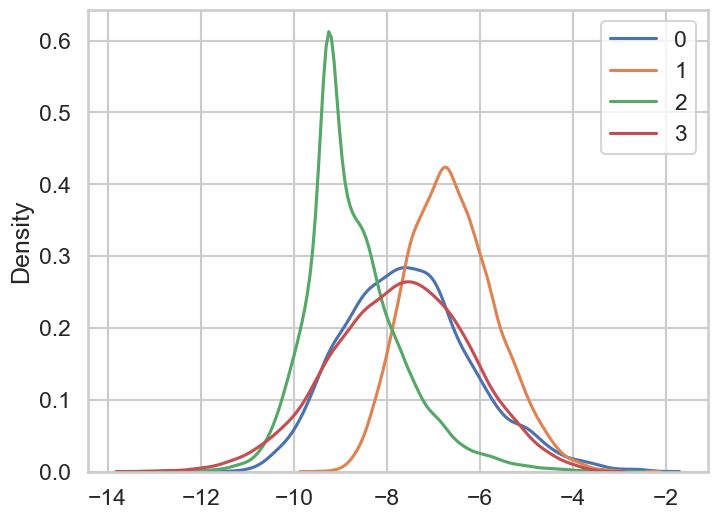

In [10]:
sns.kdeplot(logit(pred_array_0).mean(1), label='0')
sns.kdeplot(logit(pred_array_1).mean(1), label='1')
sns.kdeplot(logit(pred_array_2).mean(1), label='2')
sns.kdeplot(logit(pred_array_3).mean(1), label='3')
plt.legend()

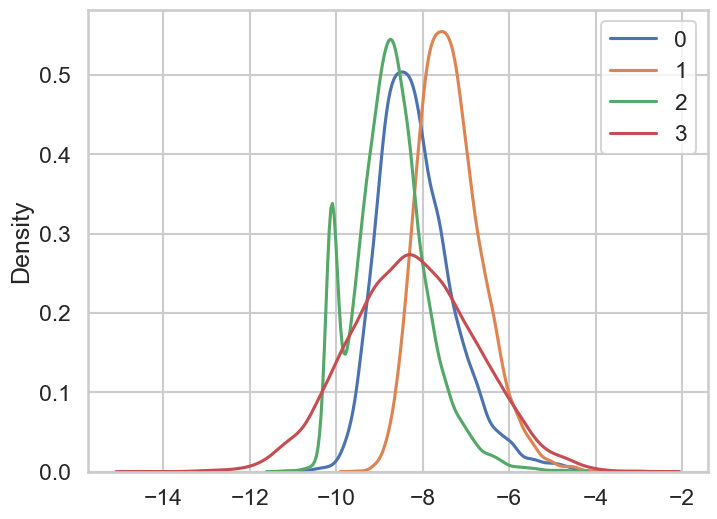

In [11]:
sns.kdeplot(logit(pred_array_0)[:, 0], label='0')
sns.kdeplot(logit(pred_array_1)[:, 0], label='1')
sns.kdeplot(logit(pred_array_2)[:, 0], label='2')
sns.kdeplot(logit(pred_array_3)[:, 0], label='3')
plt.legend()

In [12]:
df = pd.read_csv('../data/Sei/Sei_tracks_info.csv')

df_pivot = df.pivot_table(
    values="index", 
    index="cell_type", 
    columns="assay", 
    aggfunc=list,
)

df_pivot

assay                    ADNP AEBP2 AFF1 AFF4 AGO1 AGO2  AHR AHRR AP-2alpha AP-2gamma APOBEC3B   AR ARID1A ARID2 ARID3A ARID5B ARNT ARNT2 ARNTL ARRB1 ASCL1 ASCL2 ASH1L ASH2L ASXL1 ATAC-seq ATF1 ATF2 ATF3 ATF4 ATF5 ATF7IP ATOH1 ATRX AUTS2 BACH1 BACH2 BAF155 BAF170 BAHD1 BANF1 BANP BARX1 BARX2 BATF BATF3 BCAT1 BCL11A BCL11B BCL3 BCL6 BCLAF1 BCOR BDP1 BHLHE40 BIRA BMI1 BPTF BRAF BRCA1 BRD1 BRD2    BRD3    BRD4 BRD7 BRD9 BRDU BRF1 BRF2 BRPF3 BTAF1 Bach1 Brg1 C11orf30 C17orf49 C17orf96 CAMTA2 CASP8AP2 CBFA2T2 CBFB CBX1 CBX2 CBX3 CBX4 CBX5 CBX6 CBX7 CBX8 CCDC101 CCND2 CCNT2 CD59 CD74 CDC5L CDCA2 CDK12 CDK2 CDK6 CDK7 CDK8 CDK9 CDX2 CEBPA CEBPB CEBPD CEBPG CEBPZ CENPA CENPC CENPT CHAMP1 CHAT CHD1 CHD2 CHD4 CHD5 CHD7 CHD8 CHRM2 CIITA CLOCK CNOT3 COPS2 COREST CPSF3L CREB1 CREB3 CREB3L4 CREBBP CREM CRY1 CSDE1 CSNK2A1 CTBP1 CTBP2 CTCF CTCFL CTNNB1 CUX1 CtBP2 DACOR1 DAXX DCP1A DDX20 DDX21 DDX5 DEAF1  DEK DIDO1 DLX1 DLX2 DMC1 DNMT1 DNMT3A DNMT3B    DNase DNase.all.peaks DNase.fdr0.01.hot  \
cell_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1015c                     NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN       NaN      NaN  NaN    NaN   NaN    NaN    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      NaN  NaN  NaN  NaN  NaN  NaN    NaN   NaN  NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN  NaN  NaN    NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN     NaN  [8996]  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN      NaN      NaN      NaN    NaN      NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN     NaN    NaN  NaN  NaN   NaN     NaN   NaN   NaN  NaN   NaN    NaN  NaN   NaN    NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN    NaN      NaN             NaN               NaN   
10326                     NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN       NaN      NaN  NaN    NaN   NaN    NaN    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      NaN  NaN  NaN  NaN  NaN  NaN    NaN   NaN  NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN  NaN  NaN    NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  [8997]     NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN      NaN      NaN      NaN    NaN      NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN     NaN    NaN  NaN  NaN   NaN     NaN   NaN   NaN  NaN   NaN    NaN  NaN   NaN    NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN    NaN      NaN             NaN               NaN   
1184_Stem_cell            NaN   

In [13]:
# assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
cell_types_standard_names = ['K562_Leukemia_Cell', 'HepG2_Hepatocellular_Carcinoma', 'SK-N-SH_Neuroblastoma_cell_Brain', 'HCT-116_Colorectal_cancer_cell_line', 'A549', 'SK-N-SH_RA_Neuron_Brain']

In [14]:
df_tracks = df_pivot.loc[cell_types_standard_names][assays]
df_tracks.map(lambda x: len(x) if isinstance(x, list) else 0)

assay,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
cell_type,,,,,,,,
K562_Leukemia_Cell,58,91,51,34,11,5,29,29
HepG2_Hepatocellular_Carcinoma,9,8,9,2,4,3,2,17
SK-N-SH_Neuroblastoma_cell_Brain,0,3,3,0,0,0,0,2
HCT-116_Colorectal_cancer_cell_line,6,45,49,5,23,4,1,14
A549,4,45,53,3,37,1,27,10
SK-N-SH_RA_Neuron_Brain,4,1,0,1,0,1,0,5


In [15]:
# df_Sei_Siraj.loc['SK-N-SH_Neuroblastoma_cell_Brain', 'DNase'] = df_Sei_Siraj.loc['SK-N-SH_RA_Neuron_Brain', 'DNase']

for assay in assays:
    val1 = df_tracks.loc['SK-N-SH_Neuroblastoma_cell_Brain', assay]
    val2 = df_tracks.loc['SK-N-SH_RA_Neuron_Brain', assay]

    # 把 float NaN 替换成空列表
    val1 = val1 if isinstance(val1, list) else []
    val2 = val2 if isinstance(val2, list) else []

    df_tracks.loc['SK-N-SH_Neuroblastoma_cell_Brain', assay] = val1 + val2

df_tracks

assay,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
cell_type,,,,,,,,
K562_Leukemia_Cell,"[1490, 2919, 3167, 4632, 4633, 10715, 10716, 1...","[342, 343, 1357, 1392, 2010, 2082, 2085, 2086,...","[1346, 1352, 4928, 8948, 8957, 9199, 9462, 946...","[338, 339, 340, 9580, 9581, 9582, 9583, 9584, ...","[341, 1365, 1368, 4939, 4946, 8950, 8951, 1391...","[1396, 4919, 4956, 8949, 21350]","[344, 345, 1372, 1386, 4936, 9292, 9293, 9294,...","[1364, 1388, 3511, 3512, 3513, 3514, 3515, 492..."
HepG2_Hepatocellular_Carcinoma,"[984, 990, 998, 2921, 3013, 4574, 4575, 20977,...","[1525, 1526, 1739, 1780, 4841, 4852, 9230, 20995]","[1756, 1765, 4846, 9232, 17785, 18376, 19566, ...","[4849, 20991]","[1787, 4845, 7480, 20993]","[4844, 4848, 20992]","[4847, 20998]","[144, 145, 146, 147, 1755, 1762, 4850, 5311, 5..."
SK-N-SH_Neuroblastoma_cell_Brain,"[2916, 4679, 4680, 21842]","[12382, 12383, 13631, 5068]","[11641, 11642, 17960]",[5066],[],[5067],[],"[5545, 13633, 5552, 5553, 5884, 21840, 21841]"
HCT-116_Colorectal_cancer_cell_line,"[3521, 3522, 3523, 3524, 4568, 4569]","[2242, 2244, 3516, 3517, 3518, 3932, 3933, 482...","[3519, 3520, 4823, 6834, 6835, 7402, 9418, 104...","[7411, 14484, 14485, 14492, 14495]","[3928, 3929, 7401, 7410, 9417, 14482, 14483, 1...","[17297, 17649, 19276, 19732]",[19731],"[3504, 3505, 3506, 3507, 3508, 3509, 3510, 523..."
A549,"[3147, 4493, 4494, 19920]","[1664, 1668, 2466, 2470, 2613, 2621, 2623, 471...","[2478, 2487, 4707, 4715, 10889, 10890, 10891, ...","[4701, 4702, 10181]","[2462, 4716, 4718, 10999, 11000, 11001, 11094,...",[4714],"[2475, 2615, 2618, 2622, 4703, 10778, 10801, 1...","[4704, 4706, 5075, 5076, 5081, 5083, 5563, 557..."
SK-N-SH_RA_Neuron_Brain,"[2916, 4679, 4680, 21842]",[5068],NaN,[5066],NaN,[5067],NaN,"[5552, 5553, 5884, 21840, 21841]"


In [16]:
pred_array = load_h5('outputs/random_200bp_Sei_pred.h5')
print(pred_array.shape)

(10000, 21907)


In [17]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
cell_names = ['K562_Leukemia_Cell', 'HepG2_Hepatocellular_Carcinoma', 'SK-N-SH_Neuroblastoma_cell_Brain', 'HCT-116_Colorectal_cancer_cell_line', 'A549']

MPRA_df = pd.DataFrame()
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = df_tracks.loc[cell_names[i], assay]
        if isinstance(indice, list) and len(indice) > 0:
            pred = logit(pred_array[:, indice], eps=0).mean(1)
            MPRA_df[f'{cell_type}_{assay}'] = pred
        else:
            MPRA_df[f'{cell_type}_{assay}'] = np.nan

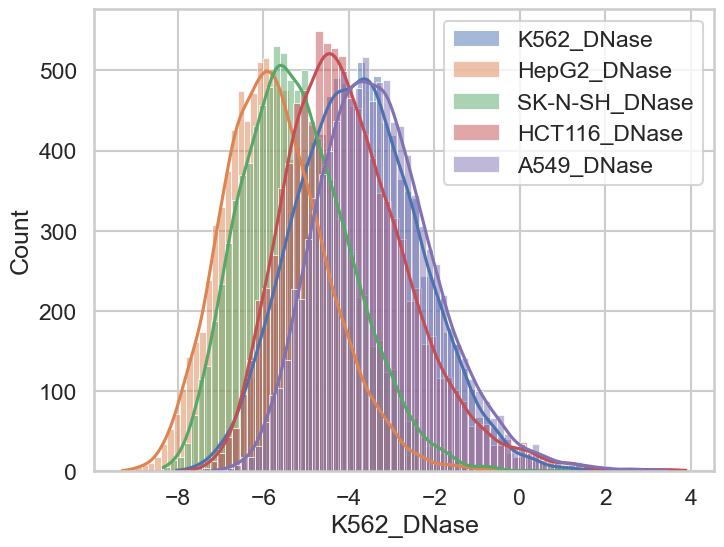

In [9]:
for col in MPRA_df.columns:
    if 'DNase' in col:
        sns.histplot(MPRA_df[col], label=col, kde=True)
plt.legend()

In [10]:
# normalize between different cell types and assays

mean_array = pd.DataFrame(index=cell_types, columns=assays)
std_array = pd.DataFrame(index=cell_types, columns=assays)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        
        x = MPRA_df[f'{cell_type}_{assay}']
        x_train = x

        x_mean = np.mean(x_train)
        x_std = np.std(x_train)
        # x = (x - x_mean) / x_std

        mean_array.loc[cell_type, assay] = x_mean
        std_array.loc[cell_type, assay] = x_std

print(mean_array)
print(std_array)

         DNase H3K4me3 H3K27ac H3K27me3 H3K4me1 H3K36me3 H3K9me3   CTCF
K562    -3.771  -6.157  -6.788   -6.273  -5.973   -8.262  -5.105 -6.681
HepG2   -5.724  -6.104  -8.153   -4.681  -6.946   -7.654  -3.921 -6.810
SK-N-SH -5.214  -5.529  -7.395   -4.167     NaN   -8.375     NaN -7.015
HCT116  -4.003  -5.559  -6.754   -4.989  -6.456   -7.855  -5.345 -6.566
A549    -3.325  -5.201  -7.175   -5.183  -7.897   -8.535  -7.272 -6.106
        DNase H3K4me3 H3K27ac H3K27me3 H3K4me1 H3K36me3 H3K9me3  CTCF
K562    1.449   1.324   0.991    0.510   1.046    0.823   0.893 1.492
HepG2   1.233   1.277   1.059    0.787   0.925    0.696   0.293 1.559
SK-N-SH 1.274   1.252   1.177    0.787     NaN    0.914     NaN 1.620
HCT116  1.481   1.250   1.135    0.602   1.168    0.824   0.503 1.442
A549    1.378   1.490   1.422    0.693   1.150    0.748   0.729 1.533


In [11]:
mean_array.to_csv('outputs/Sei_random_200bp_mean.csv')
mean_array.to_csv('outputs/Sei_random_200bp_std.csv')

In [12]:
pred_array = load_h5('outputs/Random_4096bp_Sei_pred.h5')
print(pred_array.shape)

(10000, 21907)


In [13]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
cell_names = ['K562_Leukemia_Cell', 'HepG2_Hepatocellular_Carcinoma', 'SK-N-SH_Neuroblastoma_cell_Brain', 'HCT-116_Colorectal_cancer_cell_line', 'A549']

MPRA_df = pd.DataFrame()
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = df_tracks.loc[cell_names[i], assay]
        if isinstance(indice, list) and len(indice) > 0:
            pred = logit(pred_array[:, indice], eps=0).mean(1)
            MPRA_df[f'{cell_type}_{assay}'] = pred
        else:
            MPRA_df[f'{cell_type}_{assay}'] = np.nan

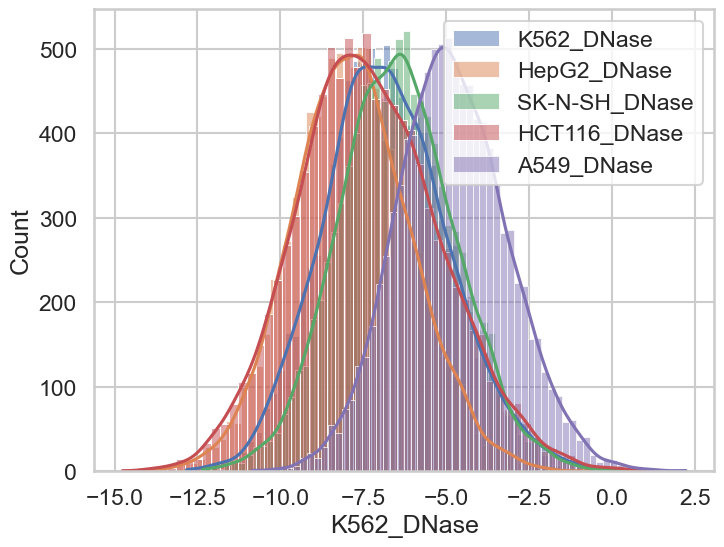

In [14]:
for col in MPRA_df.columns:
    if 'DNase' in col:
        sns.histplot(MPRA_df[col], label=col, kde=True)
plt.legend()

In [15]:
# normalize between different cell types and assays

mean_array = pd.DataFrame(index=cell_types, columns=assays)
std_array = pd.DataFrame(index=cell_types, columns=assays)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        
        x = MPRA_df[f'{cell_type}_{assay}']
        x_train = x

        x_mean = np.mean(x_train)
        x_std = np.std(x_train)
        # x = (x - x_mean) / x_std

        mean_array.loc[cell_type, assay] = x_mean
        std_array.loc[cell_type, assay] = x_std

print(mean_array)
print(std_array)

         DNase H3K4me3 H3K27ac H3K27me3 H3K4me1 H3K36me3 H3K9me3    CTCF
K562    -6.806  -9.260  -9.060   -8.742  -8.897   -7.423  -6.688 -10.749
HepG2   -7.841  -7.013  -8.115   -7.442  -8.355  -10.191  -8.484 -11.418
SK-N-SH -6.471  -6.351  -5.478   -6.790     NaN   -8.030     NaN  -9.389
HCT116  -7.319 -10.039  -9.473  -10.187  -8.096   -9.232  -9.284 -10.846
A549    -4.829  -6.590  -7.842   -8.588  -8.987   -8.140  -7.278  -9.610
        DNase H3K4me3 H3K27ac H3K27me3 H3K4me1 H3K36me3 H3K9me3  CTCF
K562    1.871   1.666   1.685    0.970   1.465    1.176   1.334 1.830
HepG2   1.779   1.920   2.029    1.652   1.589    1.351   1.394 2.001
SK-N-SH 1.752   1.714   1.832    1.381     NaN    1.537     NaN 1.797
HCT116  2.167   1.844   1.977    1.375   1.821    1.210   1.333 1.898
A549    1.674   1.812   2.079    1.272   1.629    1.315   1.046 1.883
